## TASK 1_Prediction using Supervised ML

### Author : VICTOR PAUL D

#### PROBLEM DEFINITION

- Predict the percentage of an student based on the Number of study hours.
- This is a simple linear regression task involving just 2 variables.
- What will be the predicted score if a student studies for 9.25 hrs/ day?

**Importing the required libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Importing the Dataset**

In [5]:
dataset = pd.read_csv('C:\\Users\\HP\\Desktop\\SML_Data.csv')

In [6]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
# Check for first 10 attributes
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### DATA VISUALIZATION

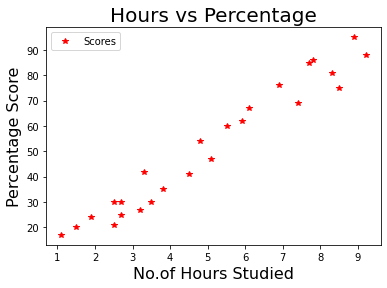

In [16]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='*',color='red')
plt.title('Hours vs Percentage',size=20)
plt.xlabel('No.of Hours Studied',size=16)
plt.ylabel('Percentage Score',size=16)
plt.show()

**_From the above plotting, we can easily indentify that there is a positive linear correlation between 
the number of hours studied and percentage of score_**

#### DATA PREPARATION

Now we have to divide the data into "attributes" (inputs) and "labels" (outputs).
Here attributes will be Hours and labels will be Scores

In [18]:
H = dataset.iloc[:, :-1].values
S = dataset.iloc[:,1].values

In [20]:
# Splitting the dataset into Train and Test data
from sklearn.model_selection import train_test_split
H_train,H_test,S_train,S_test=train_test_split(H,S,test_size=0.2,random_state=0)

In [21]:
print(H_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [22]:
print(S_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


#### TRAINING THE ALGORITHM

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(H_train,S_train)
print('Training Complete')

Training Complete


In [32]:
# Intercept of the Regression line
print(regressor.intercept_)

2.018160041434683


In [33]:
# slope of the Regression line
print(regressor.coef_)

[9.91065648]


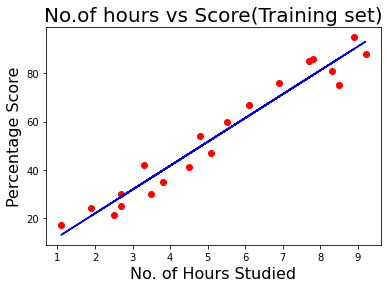

In [41]:
# Plotting the Regression line
line=regressor.coef_*H+regressor.intercept_
plt.scatter(H_train, S_train, color = 'red')
plt.plot(H_train, regressor.predict(H_train), color = 'blue')
plt.title('No.of hours vs Score(Training set)',size=20)
plt.xlabel('No. of Hours Studied',size=16)
plt.ylabel('Percentage Score',size=16)
plt.show()

#### MAKING PREDICTIONS

In [61]:
print(H_test)
S_pred = regressor.predict(H_test)
S_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [43]:
# Comparing Actual vs Predicted
V = pd.DataFrame({'Actual': S_test, 'Predicted': S_pred})
V

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**EVALUATING THE MODEL**

In [63]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(S_test, S_pred))
print('Mean Squared Error:',metrics.mean_squared_error(S_test, S_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


**TESTING WITH OUR OWN DATA**

In [53]:
S_pred=regressor.predict([[9.25]])
print('The Predicted score is',S_pred)

The Predicted score is [93.69173249]


**INFERENCE** : If a Student studies for 9.25 hours per day he/she might get 93.69173249